In [1]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [2]:
# Paso 2: Cargar los datos desde GitHub
url = "https://raw.githubusercontent.com/Marlon2507/MACHINE-LEARNING-I/main/DATA/datos_economicos.xlsx"
data = pd.read_excel(url)

# Variables derivadas
data['interaccion'] = data['tasa_desempleo'] * data['crecimiento_pib']
data['desempleo_alto'] = (data['tasa_desempleo'] > data['tasa_desempleo'].median()).astype(int)

# Variables predictoras y objetivo
X = data[['tasa_desempleo', 'crecimiento_pib', 'interaccion', 'desempleo_alto']]
y = data['crisis_economica']



In [3]:
# Paso 3: Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
# Paso 4: Entrenar modelos
# Regresión Logística
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred_log = logit.predict(X_test)
y_prob_log = logit.predict_proba(X_test)[:, 1]

# Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

In [5]:
# Paso 5: Crear DataFrame de resultados
df_resultados = X_test.copy()
df_resultados["Real"] = y_test.values
df_resultados["Logit_Pred"] = y_pred_log
df_resultados["Logit_Prob_crisis"] = y_prob_log
df_resultados["Arbol_Pred"] = y_pred_tree
df_resultados["Arbol_Prob_crisis"] = y_prob_tree
df_resultados["Error_Logit"] = df_resultados["Real"] - df_resultados["Logit_Pred"]
df_resultados["Error_Arbol"] = df_resultados["Real"] - df_resultados["Arbol_Pred"]

In [6]:
# Paso 6: Reportes de clasificación
print("\n--- Clasificación: Regresión Logística ---")
print(classification_report(y_test, y_pred_log))

print("\n--- Clasificación: Árbol de Decisión ---")
print(classification_report(y_test, y_pred_tree))


--- Clasificación: Regresión Logística ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.50      0.67         4

    accuracy                           0.90        20
   macro avg       0.94      0.75      0.80        20
weighted avg       0.91      0.90      0.89        20


--- Clasificación: Árbol de Decisión ---
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.97      0.88      0.91        20
weighted avg       0.95      0.95      0.95        20



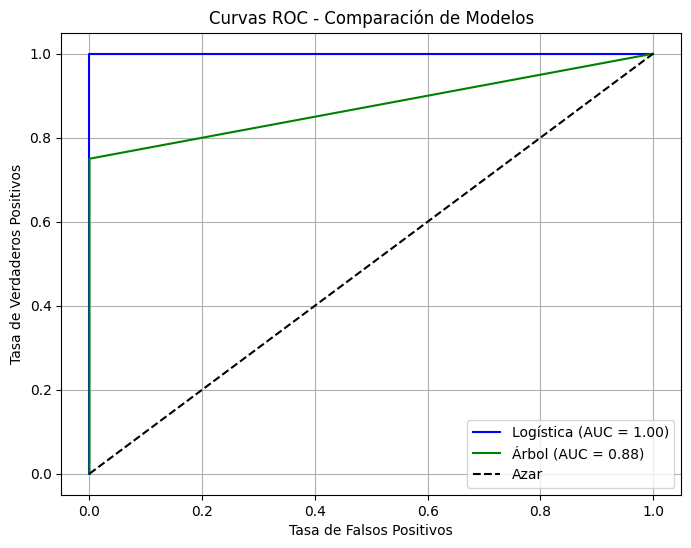

In [7]:
# Paso 7: Visualización - Curvas ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color="blue", label=f"Logística (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_tree, tpr_tree, color="green", label=f"Árbol (AUC = {roc_auc_tree:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Azar")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC - Comparación de Modelos")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

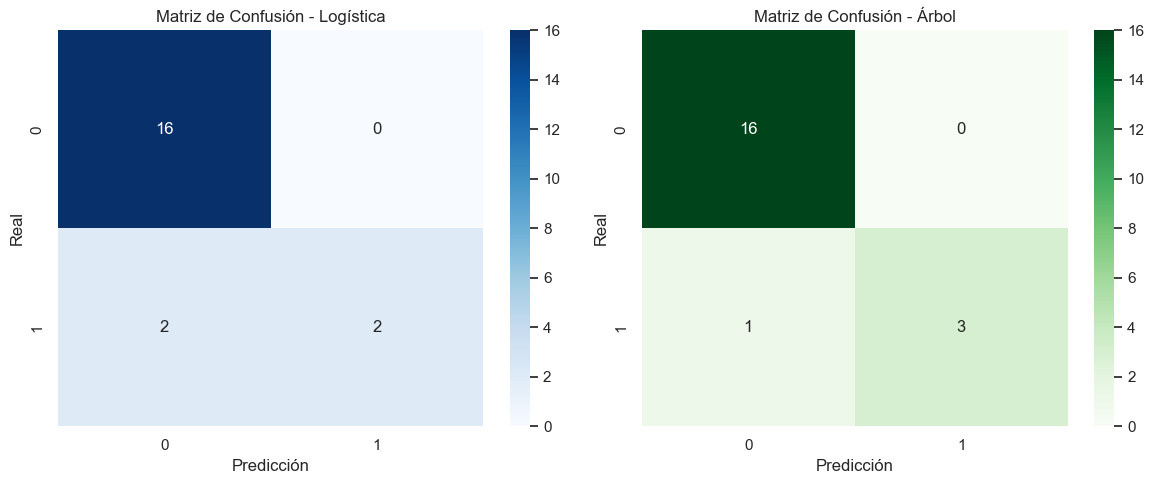

In [8]:
# Paso 8: Visualización - Matriz de confusión
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusión - Logística")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de Confusión - Árbol")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

In [9]:
# Paso 9: Exportar resultados a archivo Excel
df_resultados.to_excel("resultados_modelos_logit_arbol.xlsx", index=False)
print("Exportación completada: resultados_modelos_logit_arbol.xlsx")

Exportación completada: resultados_modelos_logit_arbol.xlsx


In [10]:
from IPython.display import FileLink
FileLink("resultados_modelos_logit_arbol.xlsx")

c:\Users\Estudiantes\Desktop\MACHINE LEARNING\resultados_modelos_logit_arbol.xlsx